Testing frames 0 to 150 (n=151)
1 zero values are not being shown
Testing frames 300 to 450 (n=151)
1 zero values are not being shown
Testing frames 600 to 750 (n=151)
1 zero values are not being shown
Testing frames 900 to 1050 (n=151)
1 zero values are not being shown
Testing frames 1200 to 1350 (n=151)
1 zero values are not being shown
Testing frames 1500 to 1650 (n=151)
1 zero values are not being shown
Testing frames 1800 to 1950 (n=151)
1 zero values are not being shown


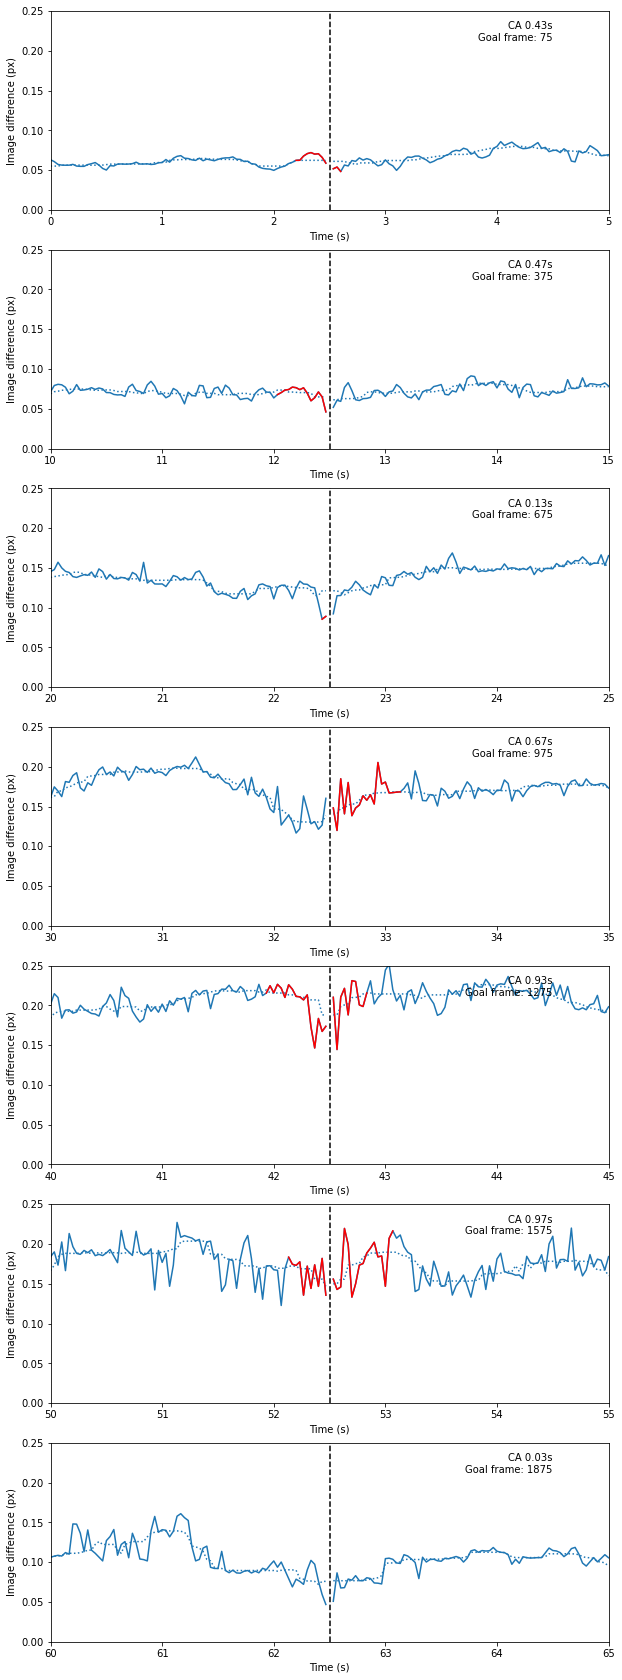

In [3]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip


db = nb.Database("../databases/rc_car/test1")

FPS = 30
SEC_DIST = 2.5
MEDFILT_SIZE_SECS = 0.5
FR_STEP = 1
RIDF_STEP = 2
PREPROC = (ip.resize(180, 55), ip.remove_sky)
FRAME_STEP_SEC = 10

FRAME_DIST = round(SEC_DIST * FPS)
MEDFILT_SIZE = round(MEDFILT_SIZE_SECS * FPS)
FRAMES = range(FRAME_DIST, len(db) - FRAME_DIST, round(FRAME_STEP_SEC * FPS))

plt.rcParams['figure.figsize'] = [10, 30]

_, axes = plt.subplots(len(FRAMES))
for fr, ax in zip(FRAMES, axes):
    (images, snap, entries) = db.load_test_frames(fr, FRAME_DIST, PREPROC, FR_STEP)
    idf = nb.route_ridf(images, snap, step=RIDF_STEP)
    ca = nb.calculate_ca(idf, goal_idx=FRAME_DIST, medfilt_size=MEDFILT_SIZE)

    times = [entry / FPS for entry in entries]
    ca.plot(times, ymax=0.25, ax=ax)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Image difference (px)')

    ca_size = ca.size()
    if ca_size is None:
        title = '[CA extends beyond limits]'
    else:
        title = 'CA %.2fs' % (ca_size / FPS)
    title += f'\nGoal frame: {entries[FRAME_DIST]}'
    ax.text(.9, .85, title, horizontalalignment='right',transform=ax.transAxes)